In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
spacing = np.concatenate([np.repeat(440, 12), 
                          np.repeat(660, 8),
                          np.repeat(880, 6), 
                          np.repeat(1056, 10),
                          np.repeat(1320, 8),
                          np.repeat(2640, 1)])

spacing = spacing * np.random.normal(1, .1, len(spacing), )

spacing

array([ 486.9353019 ,  538.58192413,  482.14288996,  373.93328811,
        525.00055244,  460.45364584,  472.69064961,  498.26905446,
        421.57419971,  453.5626349 ,  414.12179212,  412.04392282,
        731.43236316,  724.04468231,  756.47041072,  405.24051422,
        712.99037601,  740.77394066,  571.74620492,  628.83215569,
        853.24894096,  852.32520398,  937.24092987,  990.11738442,
        913.74618316,  969.03381904,  942.28438346, 1043.2739062 ,
       1027.85237075, 1291.03653513, 1021.33970854, 1028.42905796,
       1198.94683309, 1316.290313  , 1197.00508086,  996.71753636,
       1541.333689  , 1303.0972036 , 1453.00343574, 1604.82118377,
       1236.30431272, 1266.10142606, 1509.08157999, 1350.19057372,
       2473.35786963])

In [3]:
k = 0.0025 # sigmoid exponent
L = 120    # sigmoid asymptote
b0 = 10    # sigmoid intercept

def mod_sig(spacing, k, L, b0):
    return L / (1 + np.exp(-k * (spacing - 0))) - L/2 + b0
    

In [4]:
df = pd.DataFrame({'spacing': spacing})

df['spacing'] = df['spacing'].astype('float')

df['compl_bbl_per_ft'] = np.concatenate([np.repeat(45,6), np.repeat(33, 6), np.repeat(43, 8), np.repeat(42, 4), np.repeat(70, 2), 
               np.repeat(62, 3), np.repeat(45, 4), np.repeat(35, 3), np.repeat(45, 9)])

df['compl_bbl_per_ft'] = df['compl_bbl_per_ft'] + np.random.normal(1, 1, len(df))

df['compl_lbs_sd_per_ft'] = df['compl_bbl_per_ft'] * np.random.choice([30, 40, 40, 40, 50], len(df))


df['eur_per_ft'] = df.apply(lambda x: mod_sig(x['spacing'], k, L, b0), axis=1)
df['eur_per_ft'] = (1 - ((df['compl_lbs_sd_per_ft'] / df['compl_bbl_per_ft'] - 40) / 40) * (.08/.25)) * df['eur_per_ft']

df['log_eurft'] = np.log(df['eur_per_ft'])
df['log_eurft'] = df['log_eurft'] + np.random.normal(0, df['log_eurft'].std()/10, len(df))

df = df.sort_values('spacing')


df

,spacing,compl_bbl_per_ft,compl_lbs_sd_per_ft,eur_per_ft,log_eurft
3,373.933288,45.695732,1827.829298,36.166577,3.602534
15,405.240514,45.395292,1815.811695,38.035196,3.602223
11,412.043923,34.158477,1366.339064,38.432462,3.656135
10,414.121792,35.241745,1409.669791,38.553158,3.638877
8,421.574200,33.815055,1690.752757,35.864902,3.586986
9,453.562635,34.067676,1703.383815,37.524127,3.608411
5,460.453646,46.715325,1868.613002,41.166161,3.722127
6,472.690650,33.880925,1355.237013,41.830974,3.749205
2,482.142890,46.524840,1860.993588,42.337172,3.771548
0,486.935302,47.503542,1425.106272,45.998685,3.869778


In [5]:
df['eur_per_ft'] = np.exp(df['log_eurft'] + np.random.normal(0, df['log_eurft'].std() / 10, len(df)))

In [6]:
df['log_eurft'].std()

0.21441939536825222

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 5.0)

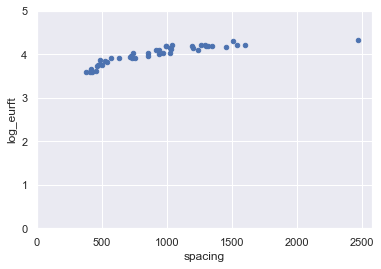

In [7]:
df.plot.scatter(x='spacing', y='log_eurft')
plt.xlim(0,)
plt.ylim(0,5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 77.81203495491981)

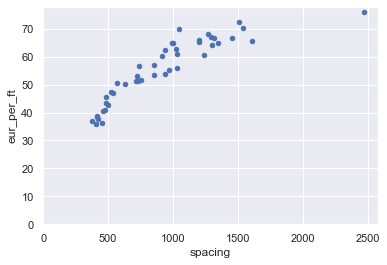

In [8]:
df.plot.scatter(x='spacing', y='eur_per_ft')
plt.xlim(0,)
plt.ylim(0,)

<AxesSubplot:xlabel='log_eurft', ylabel='Count'>

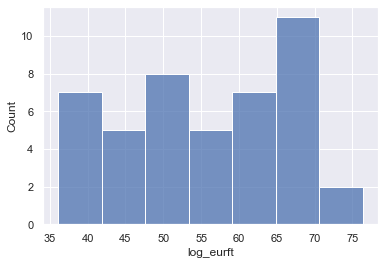

In [9]:
sns.histplot(np.exp(df['log_eurft']))

In [10]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(bootstrap=False, random_state=3, verbose=2, n_estimators=100)

# X = df.drop(['eur_per_ft', 'log_eurft'], axis=1)
X = df['spacing'].values.reshape(-1,1)
y = df['eur_per_ft']

regr.fit(X, y)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=False, random_state=3, verbose=2)

In [11]:
pred = regr.predict(X)

df_compare = df.copy()
df_compare['pred'] = pred

df_compare

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,spacing,compl_bbl_per_ft,compl_lbs_sd_per_ft,eur_per_ft,log_eurft,pred
3,373.933288,45.695732,1827.829298,37.130272,3.602534,37.130272
15,405.240514,45.395292,1815.811695,35.739990,3.602223,35.739990
11,412.043923,34.158477,1366.339064,38.910212,3.656135,38.910212
10,414.121792,35.241745,1409.669791,38.228679,3.638877,38.228679
8,421.574200,33.815055,1690.752757,37.517439,3.586986,37.517439
9,453.562635,34.067676,1703.383815,36.130539,3.608411,36.130539
5,460.453646,46.715325,1868.613002,40.679659,3.722127,40.679659
6,472.690650,33.880925,1355.237013,40.730040,3.749205,40.730040
2,482.142890,46.524840,1860.993588,43.585802,3.771548,43.585802
0,486.935302,47.503542,1425.106272,45.644481,3.869778,45.644481


(0.0, 77.81203495491992)

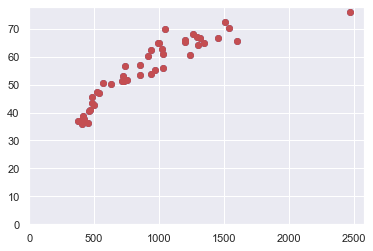

In [12]:
plt.scatter(x=df_compare['spacing'], y=df_compare['eur_per_ft'])
plt.scatter(df_compare['spacing'], df_compare['pred'], c='r')

plt.xlim(0,)
plt.ylim(0,)

In [13]:
regr.feature_importances_

array([1.])

In [14]:
from scipy.optimize import curve_fit

fit: 
k: 0.00216 
L: 118.96 
b0: 13.86


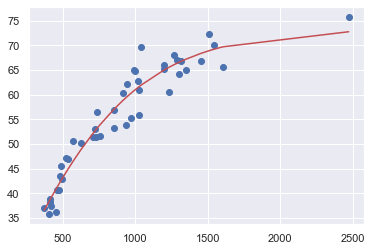

In [20]:
popt, _ = curve_fit(mod_sig, df['spacing'].values, df['eur_per_ft'].values,
                   bounds=([0, 70, 0], [.1, 200, 35]))

popt

plt.scatter(x=df['spacing'], y=df['eur_per_ft'])
plt.plot(df['spacing'], mod_sig(df['spacing'], *popt), color='r')

print('fit: \nk: %1.5f \nL: %1.2f \nb0: %1.2f' % tuple(popt))